In [94]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import imageio as iio
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [95]:
root="C:/Users/Armaan/OneDrive/Desktop/Hackathon/dataset/eye/"
classes=os.listdir(root)
classes

['Bulging_Eyes', 'Cataracts', 'Crossed_Eyes', 'Glaucoma', 'Uveitis']

In [96]:
x=[]
y=[]
n=0
for _class in classes:
    path=root+_class+"/"
    images=os.listdir(path)
    for img in images:
        imgPath=path+img
        x.append(iio.imread(imgPath))
        y.append(n)
    n+=1

C:\Users\Armaan\AppData\Local\Temp\ipykernel_27124\1332695791.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  x.append(iio.imread(imgPath))


In [97]:
[x[0].shape[0]]

[207]

In [98]:
k=[]
l=[]
m=[]
for x_ in x:
    k+=[x_.shape[0]]
    l+=[x_.shape[1]]
    m+=[x_.shape[2]]

In [99]:
k=np.array(k)
l=np.array(l)
m=np.array(m)

k.max(),k.min(),l.max(),l.min(),m.max(),m.min()

(306, 84, 478, 89, 3, 3)

In [100]:
k.shape

(383,)

In [ ]:
# df=pd.DataFrame()
# df["k"]=k
# df["l"]=l

C:\Users\Armaan\AppData\Local\Temp\ipykernel_27124\3329171049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k)


<Axes: ylabel='Density'>

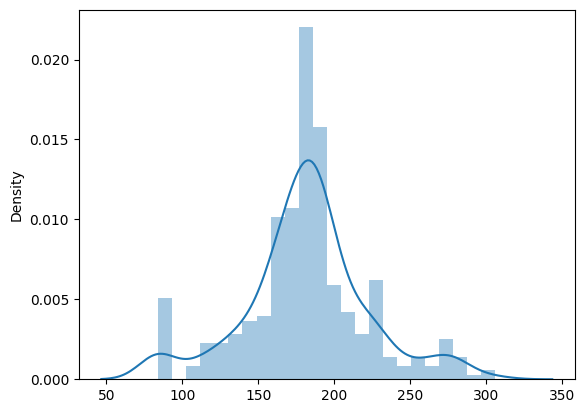

In [101]:
sns.distplot(k)

C:\Users\Armaan\AppData\Local\Temp\ipykernel_27124\3779563366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(l)


<Axes: ylabel='Density'>

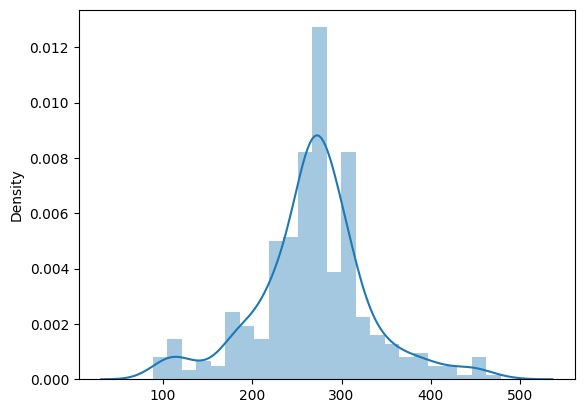

In [102]:
sns.distplot(l)

<Axes: >

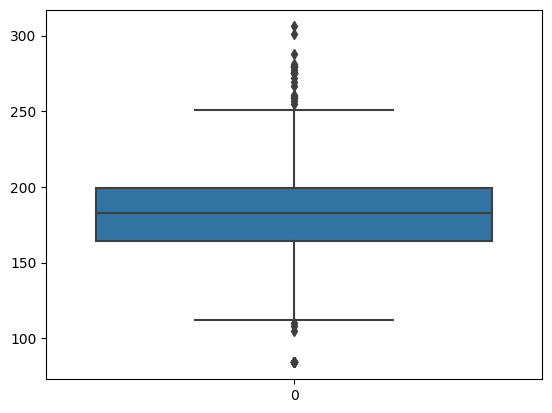

In [103]:
sns.boxplot(k)

In [104]:
def resize(x):
    x=tf.image.convert_image_dtype(x_,tf.float32)
    x=tf.image.resize(x,(180,300))
    return x
for i in range(len(x)):
    x[i]=resize(x[i])

In [105]:
x=np.array(x)
y=np.array(y)

In [106]:
x.shape,y.shape

((383, 180, 300, 3), (383,))

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,train_size=0.8,shuffle=True)

In [119]:
x_train.shape,x_test.shape

((306, 180, 300, 3), (77, 180, 300, 3))

In [130]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(180,300,3)),
    keras.layers.MaxPooling2D(),    
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(48,activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(5,activation="sigmoid")
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),loss=tf.losses.CategoricalCrossentropy(),metrics=["accuracy",tf.metrics.RootMeanSquaredError()])

In [131]:
model.fit(x_train,tf.one_hot(y_train,depth=5),epochs=20,shuffle=True)

Epoch 1/20
10/10 [==============================] - 12s 1s/step - loss: 1.7121 - accuracy: 0.3987 - root_mean_squared_error: 0.5179
Epoch 2/20
10/10 [==============================] - 10s 1s/step - loss: 1.4331 - accuracy: 0.4641 - root_mean_squared_error: 0.5069
Epoch 3/20
10/10 [==============================] - 10s 1s/step - loss: 1.4110 - accuracy: 0.4641 - root_mean_squared_error: 0.5087
Epoch 4/20
10/10 [==============================] - 11s 1s/step - loss: 1.4102 - accuracy: 0.4641 - root_mean_squared_error: 0.5035
Epoch 5/20
10/10 [==============================] - 11s 1s/step - loss: 1.3985 - accuracy: 0.4641 - root_mean_squared_error: 0.5009
Epoch 6/20
10/10 [==============================] - 11s 1s/step - loss: 1.4012 - accuracy: 0.4641 - root_mean_squared_error: 0.4941
Epoch 7/20
 1/10 [==>...........................] - ETA: 11s - loss: 1.2808 - accuracy: 0.5000 - root_mean_squared_error: 0.4788

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test,tf.one_hot((y_test),depth=5))